In [1]:
%load_ext autoreload
%autoreload 2

## Step 1. Generate a configuration file for Fermipy

In [2]:
ls ./veritas

95127.anasum.fits  95128.anasum.fits  95129.anasum.fits  95130.anasum.fits
95127.anasum.log   95128.anasum.log   95129.anasum.log   95130.anasum.log
95127.anasum.root  95128.anasum.root  95129.anasum.root  95130.anasum.root


In [3]:
import vtspy
config = vtspy.FermiConfig(files="./veritas/")
# or FermipyConfig(files="./veritas/95127.anasum.fits")

2022-06-08 10:48:25 INFO    : a configuration file (config.yaml) is created.


In [4]:
config.print_config()

2022-06-08 10:48:25 INFO    : 
binning:
  binsperdec: 8
  binsz: 0.08
  coordsys: CEL
  projtype: WCS
  roiwidth: 12
data:
  evfile: ./fermi/EV00.lst
  ltcube: null
  scfile: ./fermi/SC00.fits
fileio:
  logfile: ./log/fermipy.log
  outdir: ./fermi/
  usescratch: false
gtlike:
  edisp: true
  edisp_disable:
  - isodiff
  - galdiff
  irfs: P8R3_SOURCE_V3
model:
  catalogs: /Users/dtak/Research/scripts/vts-fermi/vtspy/refdata/gll_psc_v22.fit
  galdiff: $FERMI_DIFFUSE_DIR/gll_iem_v07.fits
  isodiff: $FERMI_DIFFUSE_DIR/iso_P8R3_SOURCE_V3_v1.txt
  src_roiwidth: 12
selection:
  dec: 30.17694222440679
  emax: 300000
  emin: 100
  evclass: 128
  evtype: 3
  glat: 82.73442268671826
  glon: 186.3593855387067
  ra: 185.3412470056114
  target: 1ES1218+304
  tmax: 599616005.0
  tmin: 599529605.0
  zmax: 105



## Step 2. Download Fermi-LAT data

In [5]:
dwn = vtspy.DownloadFermiData(verbosity=1)

2022-06-08 10:48:25 INFO    : Query parameters:
2022-06-08 10:48:25 INFO    :                     coordfield = 185.3412470056114,30.17694222440679
2022-06-08 10:48:25 INFO    :                    coordsystem = J2000
2022-06-08 10:48:25 INFO    :                     shapefield = 15
2022-06-08 10:48:25 INFO    :                      timefield = 599529605.0,599616005.0
2022-06-08 10:48:25 INFO    :                       timetype = MET
2022-06-08 10:48:25 INFO    :                    energyfield = 100,300000
2022-06-08 10:48:25 INFO    :         photonOrExtendedOrNone = Extended
2022-06-08 10:48:25 INFO    :                    destination = query
2022-06-08 10:48:25 INFO    :                     spacecraft = checked
2022-06-08 10:48:26 INFO    : The estimated time is about 10 seconds.
2022-06-08 10:48:31 INFO    : Downloading... https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L2206080448278ADDC27250_EV00.fits
2022-06-08 10:48:32 INFO    : Downloading... https://fermi.gsfc.nasa.gov/F

In [6]:
ls ./fermi

4fgl_j1221.3+3010_lightcurve.fits
4fgl_j1221.3+3010_lightcurve.npy
EV00.fits
EV00.lst
SC00.fits
_orig/
bexpmap_00.fits
bexpmap_roi_00.fits
ccube.fits
ccube_00.fits
evfile_00.txt
ft1_00.fits
gtbin.par
gtexpcube2.par
gtltcube.par
gtpsf.par
gtpsf_00.fits
gtselect.par
gtsrcmaps.par
initial.fits
initial.npy
initial_00.xml
lightcurve_599529605_599572805/
lightcurve_599529605_599616005/
lightcurve_599572805_599616005/
ltcube_00.fits
mcube_initial.fits
mcube_initial_00.fits
mcube_simple.fits
mcube_simple_00.fits
output.npy
resid_pointsource_powerlaw_2.00_residmap.fits
resid_pointsource_powerlaw_2.00_residmap.npy
sed.fits
sed.npy
simple.fits
simple.npy
simple_00.xml
srcmap_00.fits
srcmdl_00.xml
ts_pointsource_powerlaw_2.00_tsmap.fits
ts_pointsource_powerlaw_2.00_tsmap.npy
ts_pointsource_powerlaw_2.00_tsmap_npred.png
ts_pointsource_powerlaw_2.00_tsmap_sqrt_ts.png
ts_pointsource_powerlaw_2.00_tsmap_ts_hist.png


## Step 3. Analyze the Ferrmi-LAT data

### Initiate fermipy

In [158]:
from vtspy.analysis import FermiAnalysis 

fermi = FermiAnalysis("simple")

2022-06-08 13:15:11 INFO    : Initializing the Fermi-LAT analysis...
2022-06-08 13:15:14 INFO    : The setup and configuration is found [state_file = simple]. Loading the configuration...
2022-06-08 13:15:28 INFO    : The target, 4FGL J1221.3+3010, is associated with 2 source(s).
2022-06-08 13:15:28 INFO    : Initialization of Fermi-LAT has been completed.


In [10]:
fermi.print_model

2022-06-08 10:49:43 ERROR   GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J1221.3+3010      0.000  13.587  0.000985   1.20     44.96         5.6     
4FGL J1217.9+3007      0.753   1.087  8.83e-05   1.97      7.11         7.2     
4FGL J1225.9+2951      1.038   0.870  5.21e-06   2.35       nan         0.5     
4FGL J1221.5+2814      1.930   0.483  3.58e-05   2.16      3.83         4.5     
4FGL J1231.7+2847      2.641   1.362  2.78e-05   1.99     11.14         2.4     
4FGL J1208.1+3017      2.871   0.414  1.18e-06   1.79       nan         0.1     
4FGL J1220.1+3432      4.378   1.647  3.92e-06   2.07       nan         0.4     
4FGL J1205.8+3321      4.589   0.684  1.45e-06   2.68       nan         0.3     
4FGL J1159.5+2914      4.832   0.061  5.91e-06   2.42      0.11         0.8     
4FGL J1215.1+3513      5.219   0.575  1.41e-06   2.64 

### Check whether our source is in the list

In [11]:
fermi.print_association

2022-06-08 10:49:43 INFO    : 0) 4FGL J1221.3+3010:['PG 1218+304', '1ES 1218+304']
2022-06-08 10:49:43 INFO    : 1) 4FGL J1217.9+3007:['B2 1215+30', '1ES 1215+303']
2022-06-08 10:49:43 INFO    : 2) 4FGL J1225.9+2951:[]
2022-06-08 10:49:43 INFO    : 3) 4FGL J1221.5+2814:['W Comae']
2022-06-08 10:49:43 INFO    : 4) 4FGL J1231.7+2847:['B2 1229+29']
2022-06-08 10:49:43 INFO    : 5) 4FGL J1208.1+3017:['GB6 J1208+3015']
2022-06-08 10:49:43 INFO    : 6) 4FGL J1220.1+3432:['GB2 1217+348']
2022-06-08 10:49:43 INFO    : 7) 4FGL J1205.8+3321:['SDSS J120542.82+332146.9']
2022-06-08 10:49:43 INFO    : 8) 4FGL J1159.5+2914:['Ton 599', '3EG J1200+2847', 'TON 0599']
2022-06-08 10:49:43 INFO    : 9) 4FGL J1215.1+3513:['7C 1212+3524']
2022-06-08 10:49:43 INFO    : 10) 4FGL J1230.2+2517:['ON 246', 'S3 1227+25']
2022-06-08 10:49:43 INFO    : 11) 4FGL J1224.4+2436:['MS 1221.8+2452']
2022-06-08 10:49:43 INFO    : 12) 4FGL J1212.2+2442:['NVSS J121219+244130']
2022-06-08 10:49:43 INFO    : 13) 4FGL J1241.5+34

### Perform a simple analysis

In [10]:
fermi.simple_fit()

In [11]:
fermi.print_model

2022-06-07 17:45:54 ERROR   GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J1221.3+3010      0.000  12.726   0.00104   1.16     49.05         5.2    *
4FGL J1217.9+3007      0.753   0.736  4.95e-05   2.70      6.73        10.6    *
4FGL J1225.9+2951      1.038   2.433  1.46e-05   2.35      3.21         1.3    *
4FGL J1221.5+2814      1.930   0.383  2.84e-05   2.16      2.88         3.6    *
4FGL J1231.7+2847      2.641   0.402  0.000521   0.77     15.42         1.0    *
4FGL J1159.5+2914      4.832   0.061  5.91e-06   2.42      0.11         0.8     
4FGL J1230.2+2517      5.249   0.510  1.84e-05   2.16      1.82         1.9     
isodiff                  ---   1.524    0.0771   2.24     65.70        47.4    *
galdiff                  ---   0.100    0.0266   0.00     -0.02         2.2    *



### Remove weak sources

In [12]:
fermi.remove_weak_srcs()
fermi.simple_fit()

2022-06-07 17:45:54 INFO    : 0 sources are deleted.


In [13]:
fermi.print_model

2022-06-07 17:46:11 ERROR   GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J1221.3+3010      0.000  12.726   0.00104   1.16     49.05         5.2    *
4FGL J1217.9+3007      0.753   0.736  4.95e-05   2.70      6.73        10.6    *
4FGL J1225.9+2951      1.038   2.433  1.46e-05   2.35      3.21         1.3    *
4FGL J1221.5+2814      1.930   0.383  2.84e-05   2.16      2.88         3.6    *
4FGL J1231.7+2847      2.641   0.402  0.000521   0.77     15.42         1.0    *
4FGL J1159.5+2914      4.832   0.061  5.91e-06   2.42      0.11         0.8     
4FGL J1230.2+2517      5.249   0.510  1.84e-05   2.16      1.82         1.9     
isodiff                  ---   1.524    0.0771   2.24     65.70        47.4    *
galdiff                  ---   0.100    0.0266   0.00     -0.02         2.2    *



In [14]:
fermi.print_params

2022-06-07 17:46:11 ERROR   GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J1159.5+2914
   0 norm                    0.0606         0     1e-05     1e+03     1e-10     
   1 alpha                     2.17         0        -5         5         1     
   2 beta                    0.0675         0        -2         2         1     
   3 Eb                         485         0       485       485         1     
4FGL J1217.9+3007
   4 norm                     0.736     0.608     1e-05     1e+03     1e-11    *
   5 alpha                     2.59     0.759        -5         5         1    *
   6 beta                    0.0514     0.369        -2         2         1    *
   7 Eb                    1.07e+03         0  1.07e+03  1.07e+03         1     
4FGL J1221.3+3010
   8 Prefactor                 12.7      6.75     1e-05     1e+03     1e-13    *

### Check TS distribution

In [13]:
fermi.simple_analysis(jobs=["ts"])

2022-06-08 10:49:57 INFO    : Generating a TS map...
2022-06-08 10:50:40 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/dtak/Research/FermiAnalysis/1ES1218+304/./fermi/ts_pointsource_powerlaw_2.00_tsmap.npy
2022-06-08 10:50:40 INFO    : Generating the TS map is completed.


2022-06-08 10:57:24 INFO    : Loading the output file...


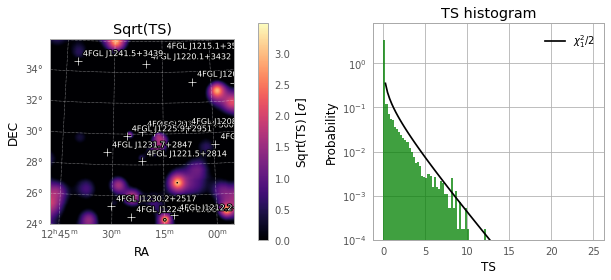

In [15]:
fermi.plotting(["sqrt_ts", "ts_hist"])

### Check resid distribution

In [16]:
fermi.simple_analysis(jobs=["resid"])

2022-06-08 10:57:40 INFO    : Generating a residual distribution...
2022-06-08 10:57:50 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/dtak/Research/FermiAnalysis/1ES1218+304/./fermi/resid_pointsource_powerlaw_2.00_residmap.npy
2022-06-08 10:57:50 INFO    : Generating the residual distribution is completed.


2022-06-08 10:57:50 INFO    : Loading the output file...


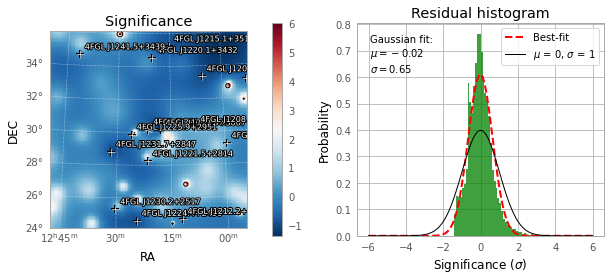

In [17]:
fermi.plotting(["sigma", "resid"])

### Calculate SED

In [21]:
fermi.simple_analysis(jobs=["sed"])

2022-06-08 11:04:19 INFO    : Generating a SED... 
2022-06-08 11:04:31 INFO    : Generating the SED is completed.


2022-06-08 11:04:50 INFO    : Loading the output file...


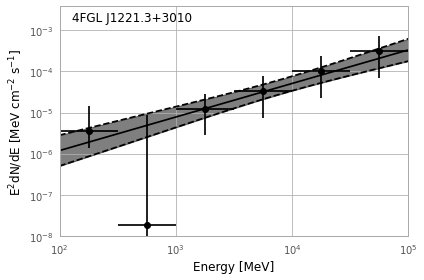

In [22]:
fermi.plotting("sed", ymin=1e-8)

## Step 4. Construct dataset for the joint-fit analysis

In [159]:
fermi.construct_dataset()

2022-06-08 13:15:36 INFO    : Loading the Fermi-LAT events...
2022-06-08 13:15:36 INFO    : Loading the Fermi-LAT IRFs...
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2022-06-08 13:15:36 WARNING : FITSFixedWarning: RADECSYS= 'FK5 ' 
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58849.000000 from DATE-OBS.
Set MJD-END to 58850.000000 from DATE-END'. [astropy.wcs.wcs]
2022-06-08 13:15:36 WARNING : FITSFixedWarning: 'datfix' made the change 'Set DATEREF to '2001-01-01T00:01:04.184' from MJDREF.
Set MJD-OBS to 58849.000000 from DATE-OBS.
Set MJD-END to 58850.000000 from DATE-END'.
2022-06-08 13:15:37 INFO    : Loading the Fermi-LAT models...


In [203]:

params = {
    "PowerLaw": {"index": float, "amplitude": float, "reference": float}
}


In [197]:
a = gammapy_model.LogParabolaSpectralModel()

In [200]:
from gammapy.modeling.models import (
    Models,
)

In [202]:
Models(a)

AttributeError: 'LogParabolaSpectralModel' object has no attribute 'name'

### Peek events and irfs

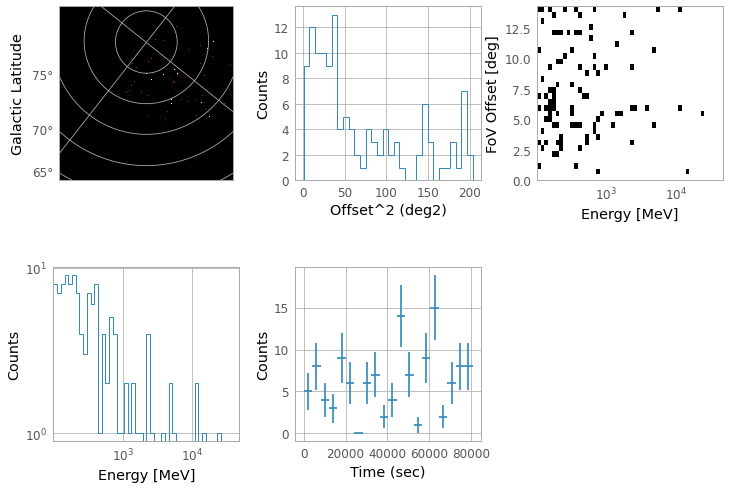

In [187]:
fermi.peek_events()

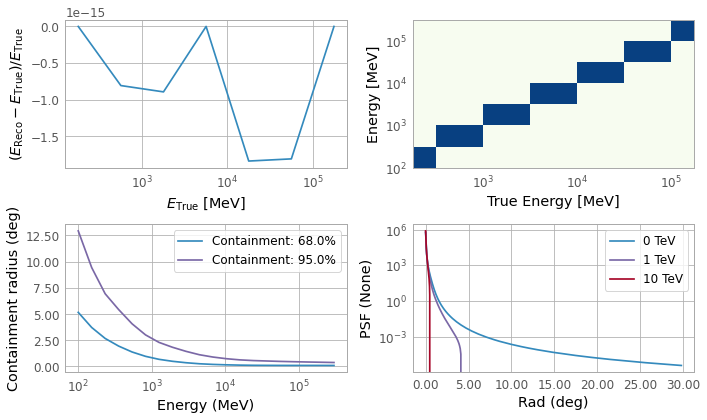

In [188]:
fermi.peek_irfs()